# Best Approximation vs Lagrange Interpolation

The Lagrange Interpolation of a function $f$ on a point $x$ is defined as 

$$(Lf)(x) = \Sigma_{i = 0}^nf(x_i)v_i(x)$$

with 

$$v_i = \Pi^n_{i \neq j, j = 0} \frac{x - x_j}{x_i - x_j}$$

This is a matrix-vector multiplication, since most of the time that's what we do in numerical analysis.

$p \in P^n, \|f - p\|_\infty \leq \|f - q\|_\infty \forall q \in P^n$

$\|f - Lf\|_\infty = \|f - p + - Lf\|_\infty = \|(f-p) - Lf(f-p)\|_\infty \leq$

$ \leq \|f - p\| + \|L(f - p)\|_\infty \leq \|\Lambda\|_\infty$ with $\Lambda(x) = \Sigma^n_{i = 0} | v_i(x) |$ 

Chebyshev's Polynomial interpolation is obtained by trying to minimize the Labegue function $\Lambda$.

The final result is that $\|f - Lf\|_\infty \leq (1 + \|\Lambda\|_\infty)\|f - p\|_\infty$. Knowing that $\|\Lambda\|_\infty \geq e + log(n)$, this value explodes and proves that Lagrange approximation is not good for whole functions.


$$1 = 1 \implies ((1 - x) + x)^n = \Sigma^n_{i = 0}\binom{n}{i}x^i(1 - x)^{n - 1} = \Sigma^n_{i = 0} B^n_i(x)$$

B is the **Bernstein's Polynomial** (basis function) which is always positive by definition.

$$B_nf = \Sigma_{i = 0}^{n}f(\frac{i}{n})B^n_i(x) \implies B_nf \geq 0, \forall f \geq 0$$

So it satisfies the first ingredient of the Weierstrass Proof.

$B_n1 = 1$, $B_nx = x$, $B_nx^2 = \frac{n}{}x^2$

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [55]:
def lagrange_basis(j,q,x):
    return product([(x-q[i])/(q[j] - q[i]) for i in range(len(q)) if i != j], axis=0)

def lagrange_c(j, q, x):
    y = 1
    for i in range(len(q)):
        if i != j:
            y *= (x - q[i]) / (q[j] - q[i])
    return y

def lebague(q, x):
    return sum([abs(lagrange_basis(i,q,x)) for i in range(len(q))], axis = 0)

def lebague_c(q, x):
    y = 0
    for i in range(len(q)):
        y += abs(lagrange_basis(i,q,x))
    return y

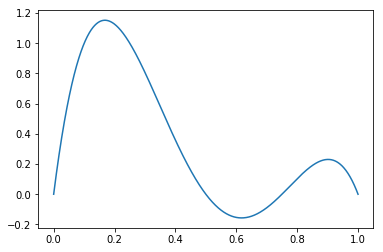

In [49]:
plot(x, lagrange_basis(1, q, x))

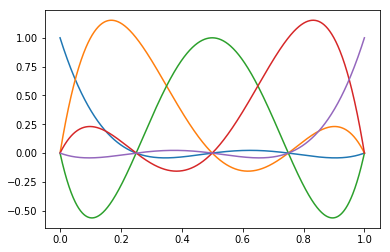

In [50]:
for i in range(len(q)):
    plot(x, lagrange_basis(i,q,x))

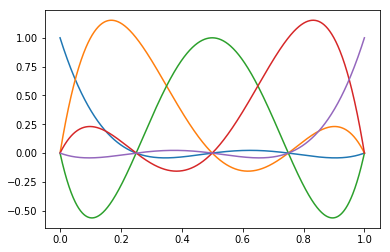

In [52]:
for i in range(len(q)):
    _ = plot(x, lagrange_c(i,q,x))

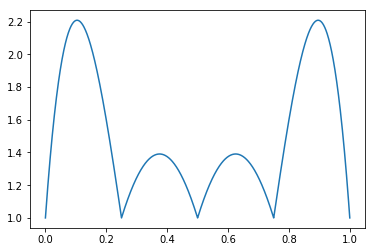

In [59]:
N = 5
q = linspace(0, 1, N)

plot(x, lebague(q,x))

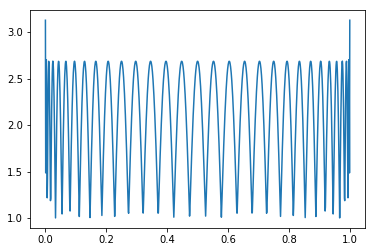

In [61]:
import numpy
q, w = numpy.polynomial.chebyshev.chebgauss(30)

q *= .5
q += .5

plot (x, lebague(q,x))